In [1]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import tree

In [2]:
import pandas as pd
# Raw URL of the CSV file
data_url = "./adult.csv"
# Read the CSV file
adult = pd.read_csv(data_url)
adult[:5]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [3]:
# 特征和目标变量
X = adult.drop("income", axis=1)
y = adult["income"]

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree,export_text
# 将分类变量转换为数值编码
X = pd.get_dummies(X)

# 2. 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. 决策树建模
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

In [8]:
print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8439803439803439
0.8436892210052206


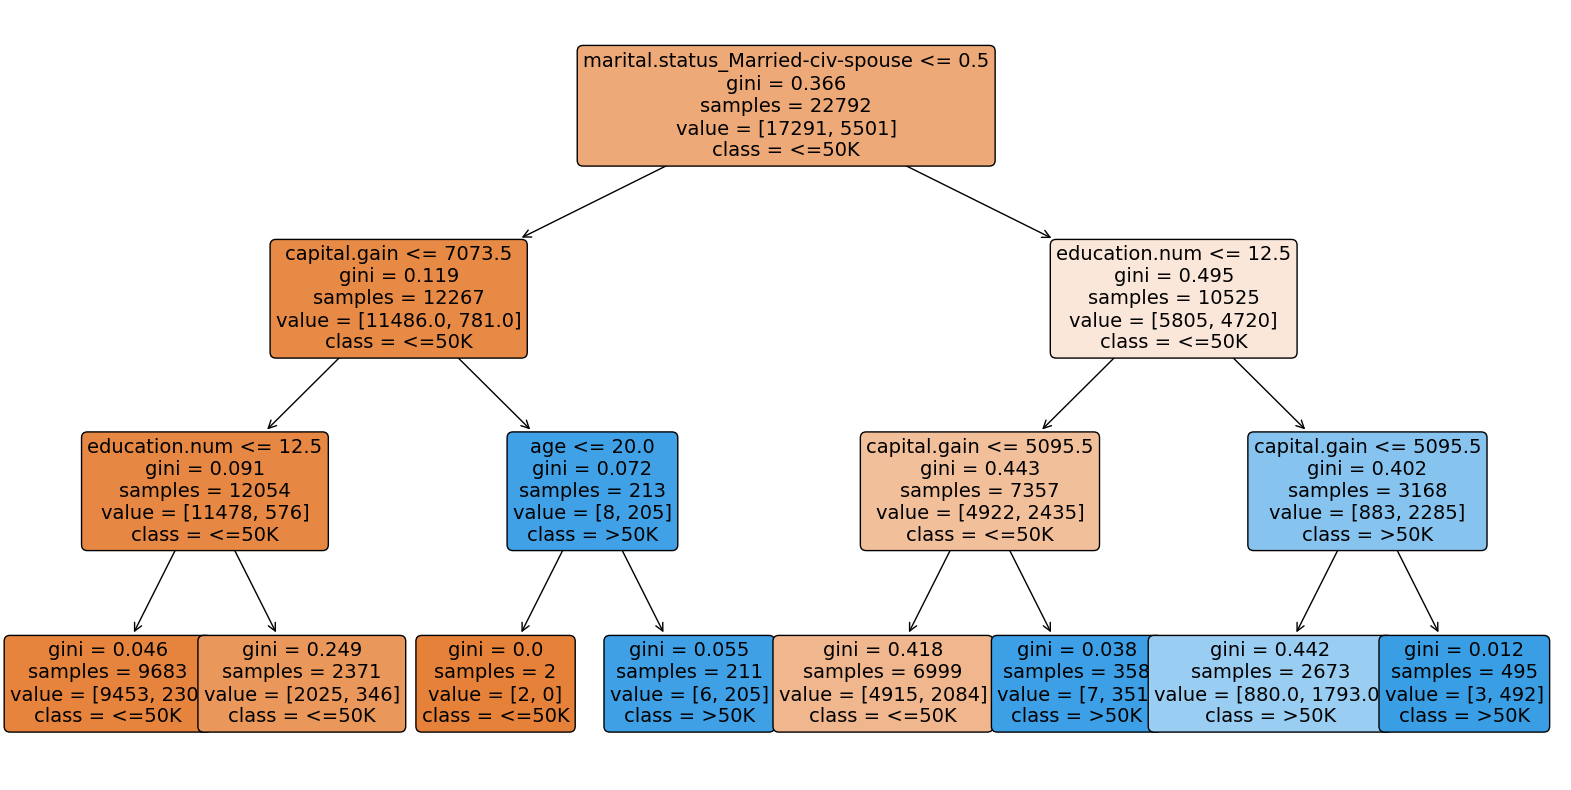

In [9]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, fontsize=14, feature_names=X.columns, class_names=["<=50K", ">50K"], rounded=True)
plt.show()

In [10]:
# 提取决策树的规则
tree_rules = export_text(clf, feature_names=X.columns, show_weights=True)
print(tree_rules)

|--- marital.status_Married-civ-spouse <= 0.50
|   |--- capital.gain <= 7073.50
|   |   |--- education.num <= 12.50
|   |   |   |--- weights: [9453.00, 230.00] class: <=50K
|   |   |--- education.num >  12.50
|   |   |   |--- weights: [2025.00, 346.00] class: <=50K
|   |--- capital.gain >  7073.50
|   |   |--- age <= 20.00
|   |   |   |--- weights: [2.00, 0.00] class: <=50K
|   |   |--- age >  20.00
|   |   |   |--- weights: [6.00, 205.00] class: >50K
|--- marital.status_Married-civ-spouse >  0.50
|   |--- education.num <= 12.50
|   |   |--- capital.gain <= 5095.50
|   |   |   |--- weights: [4915.00, 2084.00] class: <=50K
|   |   |--- capital.gain >  5095.50
|   |   |   |--- weights: [7.00, 351.00] class: >50K
|   |--- education.num >  12.50
|   |   |--- capital.gain <= 5095.50
|   |   |   |--- weights: [880.00, 1793.00] class: >50K
|   |   |--- capital.gain >  5095.50
|   |   |   |--- weights: [3.00, 492.00] class: >50K



In [15]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=6)
DT_reg=regressor.fit(X_train, Y_train)

In [16]:
print(DT_reg.score(X_train,Y_train))
print(DT_reg.score(X_test,Y_test))

0.9539273064847269
0.6202803451971124


In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [19]:
DT_reg

DecisionTreeRegressor(max_depth=6)

In [20]:
feature_names = [
    'Crime Rate', '%Residential in Area', '% Business in Area',
    '','Air Pollution', '# Rooms in House', '%Pre-1940 Units',
    'Dist. to Business District', 'Highway Accessibility', 'Property Tax Rate', 'Student-Teacher Ratio',
    'B', '%\Lower Income in Area'
]

DecisionTreeRegressor(max_depth=6)

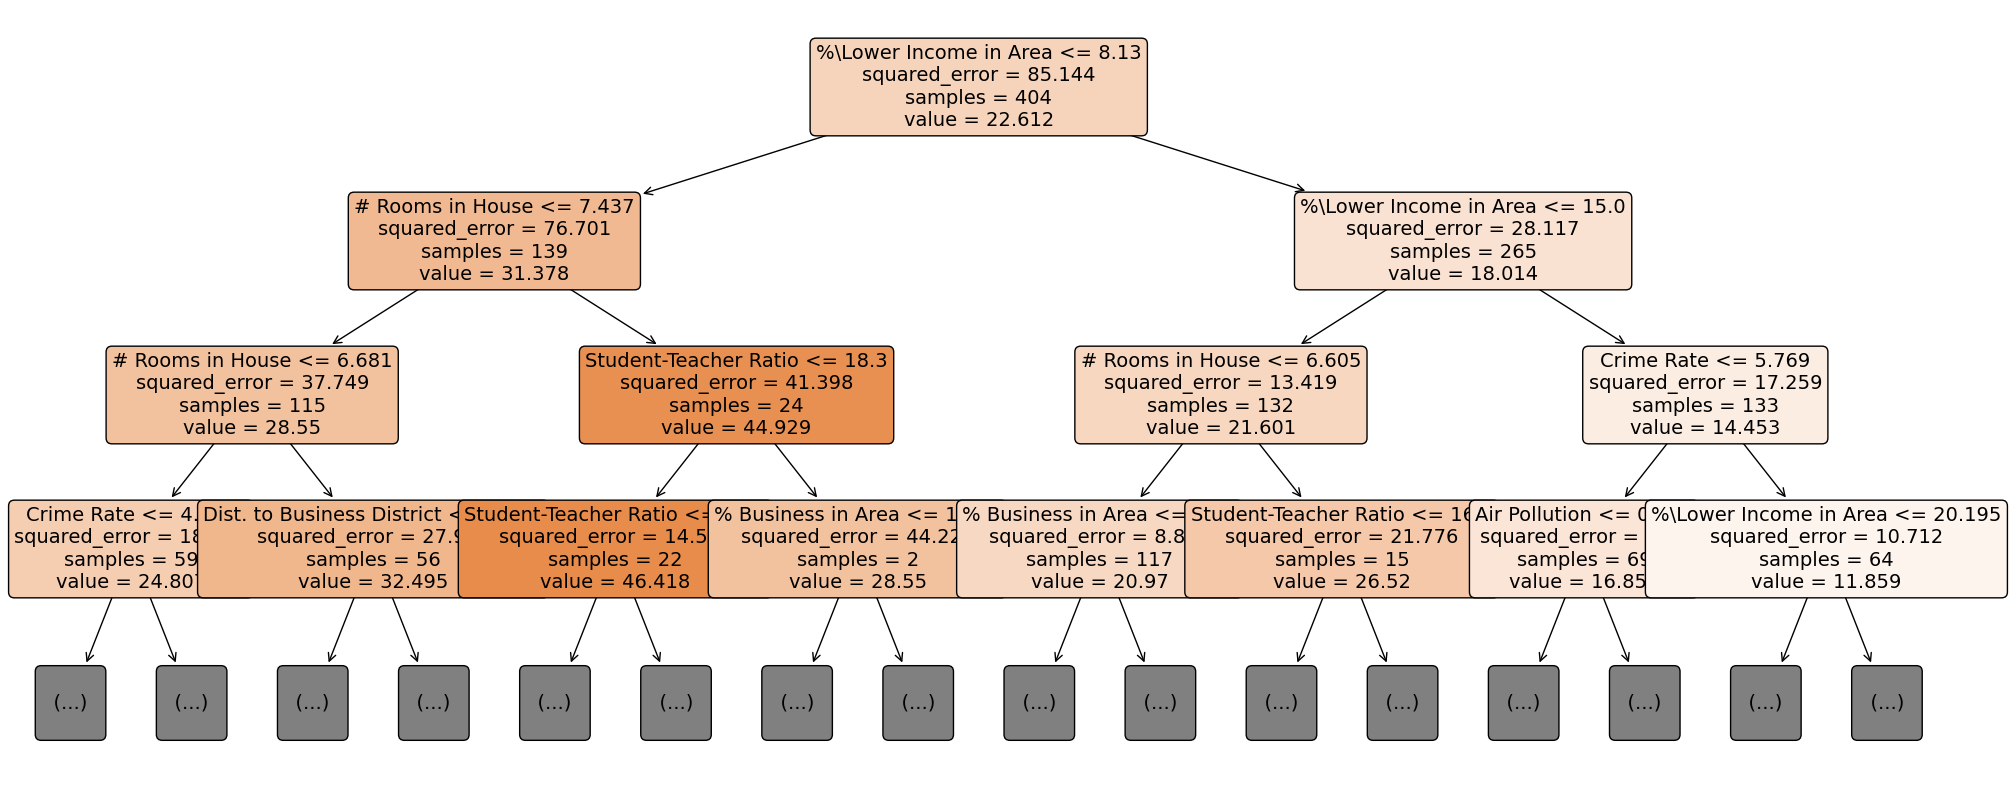

In [21]:
plt.figure(figsize=(25,10))
a = plot_tree(regressor, 
              feature_names=feature_names, 
              class_names=Y, 
              filled=True, 
              rounded=True, 
              fontsize=14,
              max_depth=3)